# 1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
%matplotlib inline

# 2. Loading the Dataset

**About the data:**

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

data types:
- **Categorical**: Survived, Sex, and Embarked.  **Ordinal**: Pclass.
- **Continous**: Age, Fare. **Discrete**: SibSp, Parch.
- Ticket is a **mix of numeric and alphanumeric** data types. Cabin is **alphanumeric**.

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Exploratory Data Analysis

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.drop(columns = ['PassengerId'], inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
data['Sex'] = data['Sex'].map({'male' : 1, 'female' : 2})

In [ ]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Visualization

### Categorical Data

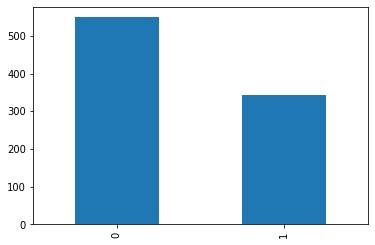

In [ ]:
data['Survived'].value_counts().plot(kind = 'bar')

In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

Text(0.5, 1.0, 'The percentage of Surviving based on gender')

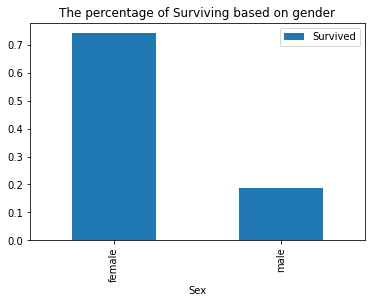

In [ ]:
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind = 'bar')
plt.title('The percentage of Surviving based on gender')

We confirm that females had very high survival rate at 74% 

In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

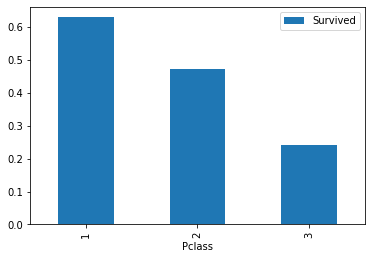

In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot(kind = 'bar')

There is a significant correlation among Pclass=1 and Survived

Pclass=3 had most passengers, however most did not survive.

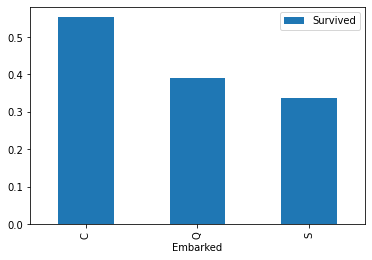

In [ ]:
data[['Embarked', 'Survived']].dropna().groupby(['Embarked']).mean().plot(kind = 'bar')

There is a significant correlation (> 0.5) among Embarked = C and Survived

In [ ]:
data['Cabin'] = data['Cabin'].fillna(0)
data['Cabin'][data['Cabin'] != 0] = 1

<ipython-input-88-28d9bdb00f0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][data['Cabin'] != 0] = 1


In [ ]:
data['Cabin'].unique()

array([0, 1], dtype=object)

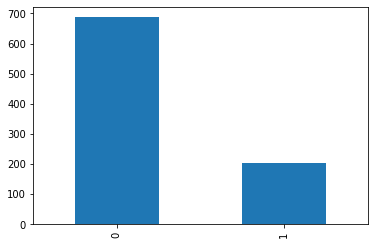

In [ ]:
data['Cabin'].value_counts().plot(kind = 'bar')

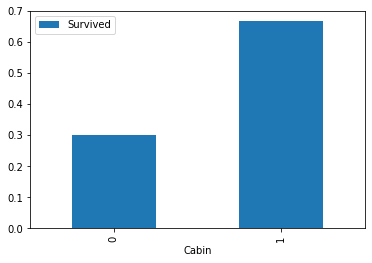

In [ ]:
data[['Cabin', 'Survived']].groupby(['Cabin']).mean().plot(kind = 'bar')

Most passengers with no cabine but the passengers with a cabine have a significant correlation (> 0.65) with survived

### Numerical Data
Continous: Age, Fare. Discrete: SibSp, Parch.

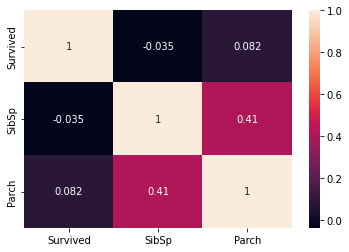

In [ ]:
sns.heatmap(data[['Survived', 'SibSp',	'Parch']].corr(), annot = True)

There is no correlation between SibSp, Parch and surviving so we can drop it or creating a new feature 

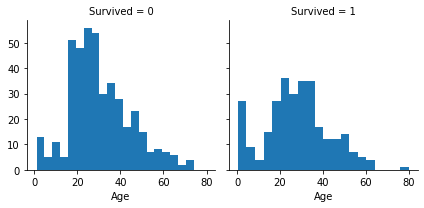

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

There is a correlation between being in age = (18 - 30) and unsurviving

passengers in Pclass=2 and Pclass=3 mostly unsurvived.

Most passengers in Pclass=1 survived.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


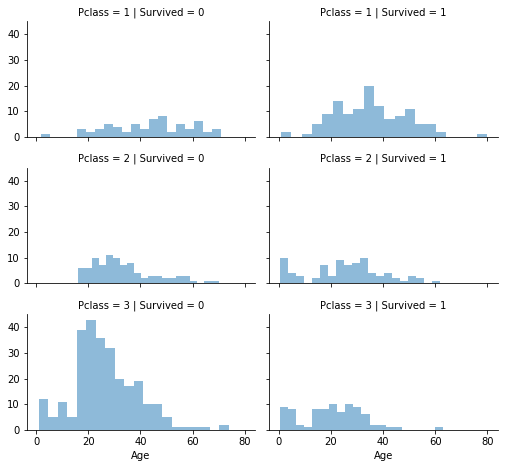

In [ ]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


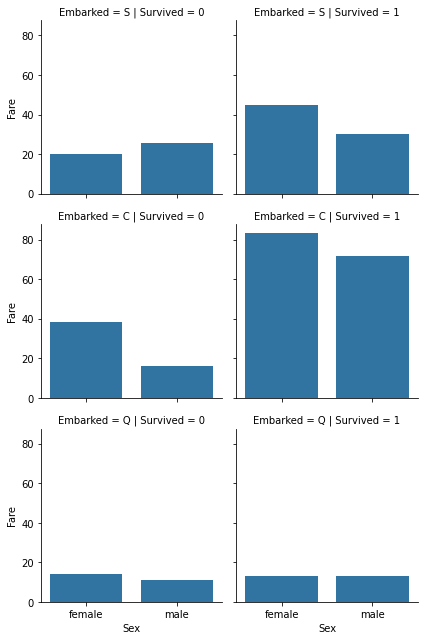

In [ ]:
g = sns.FacetGrid(data, row = 'Embarked',col='Survived')
g.map(sns.barplot, 'Sex','Fare', ci = None)

- Higher fare paying passengers had better survival. Confirms our assumption
- Port of embarkation correlates with survival rates. Confirms correlating

**Conclusion**


- Ticket feature may be dropped from our analysis as there may not be a correlation between Ticket and survival.
- PassengerId may be dropped from training dataset as it does not contribute to survival.
- Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

Feature Engineering

- We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
- We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
- We may also want to create a Fare range feature if it helps our analysis.

## Handling missing values

In [ ]:
data.drop(columns= 'Ticket', inplace= True)

In [ ]:
data.drop(columns= 'Name', inplace= True)

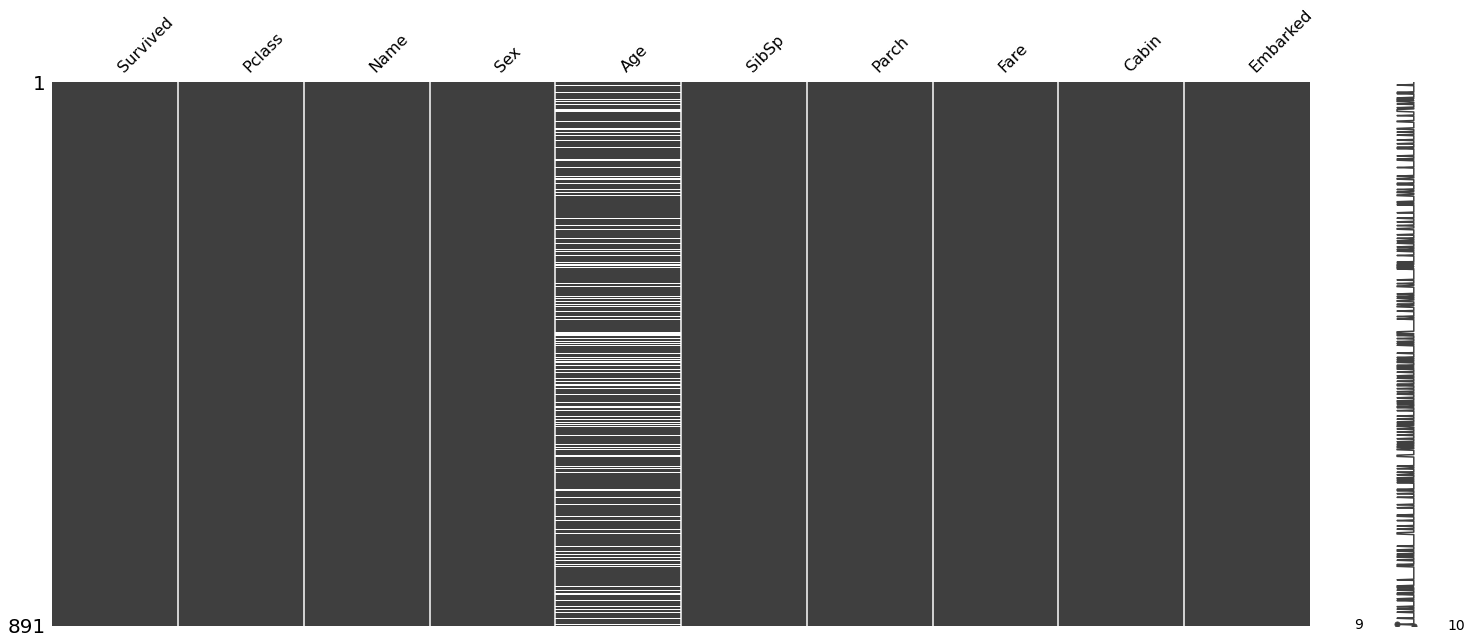

In [ ]:
msno.matrix(data)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Fare, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [ ]:
impute = KNNImputer(n_neighbors = 5)

In [ ]:
data[['Age', 'Pclass', 'Survived', 'Fare']] = impute.fit_transform(data[['Age', 'Pclass', 'Survived', 'Fare']])

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

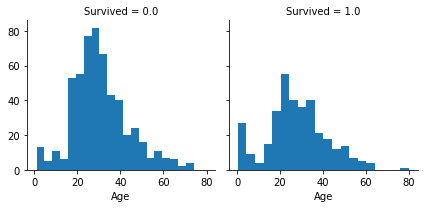

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
data.duplicated().sum()

0

## Feature Engineering

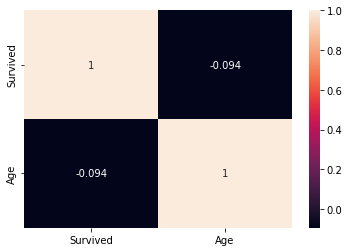

In [ ]:
sns.heatmap(data[['Survived', 'Age']].corr(), annot = True)

In [ ]:
data['AgeBaned'] = pd.cut(data['Age'], bins = 5)

In [ ]:
data[['AgeBaned', 'Survived']].groupby(['AgeBaned']).mean()

,Survived
AgeBaned,
"(0.34, 16.336]",0.544554
"(16.336, 32.252]",0.357918
"(32.252, 48.168]",0.371429
"(48.168, 64.084]",0.410959
"(64.084, 80.0]",0.090909


In [ ]:
data['AgeBaned'].replace(data['AgeBaned'].unique(), np.arange(5), inplace = True)

In [ ]:
data['AgeBaned'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
data.drop(columns= 'Age', inplace= True)

Create a new feature from SibSp and Parch 

In [ ]:
data['FamileySize'] = data['SibSp'] + data['Parch'] + 1

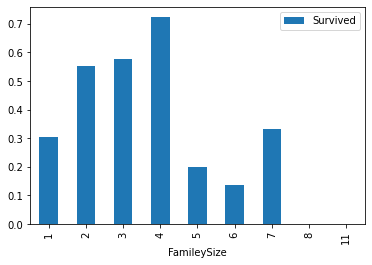

In [ ]:
data[['FamileySize', 'Survived']].groupby(['FamileySize']).mean().plot(kind = 'bar')

In [ ]:
data.drop(columns= ['SibSp', 'Parch'], inplace= True)

Convert categorical to numerical data

In [ ]:
data['Cabin'] = data['Cabin'].astype('int64')

In [ ]:
data['Sex'] = data['Sex'].map({'male' : 0, 'female' : 1})

In [ ]:
data['Sex'].unique()

array([0, 1])

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data['Embarked'].replace(data['Embarked'].unique(), np.arange(3), inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Sex          891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Cabin        891 non-null    int64  
 5   Embarked     891 non-null    int64  
 6   AgeBaned     891 non-null    int64  
 7   FamileySize  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [ ]:
data['FareBand'] = pd.cut(data['Fare'], bins= 4)

In [ ]:
data[['FareBand', 'Survived']].groupby(['FareBand']).mean()

,Survived
FareBand,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [ ]:
data['FareBand'].replace(data['FareBand'].unique(), np.arange(4), inplace = True)

In [ ]:
data.drop(columns= 'Fare', inplace= True)

# Model Selection

In [ ]:
X = data.drop(columns= 'Survived')
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state= 40)

In [ ]:
clf1 = DecisionTreeClassifier(max_depth = 7, min_samples_split = 6)

In [ ]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

In [ ]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

Accuracy score :  0.8156424581005587
f1 score :  0.7659574468085107


In [ ]:
clf2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

Accuracy score :  0.8044692737430168
f1 score :  0.7407407407407408


In [ ]:
clf3 = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred = clf3.predict(X_test)

In [ ]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

Accuracy score :  0.7988826815642458
f1 score :  0.7499999999999999


## explore the most important parameters of Decision tree model and how they impact our model in term of over-fitting and under-fitting.

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8094861660079051

## Implementation: Model Tuning

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
optimclf = DecisionTreeClassifier()

# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"max_depth" : [3, 4, 5], "max_features" : [3], "min_samples_split" : [5, 7],
              'min_samples_leaf' : [5]}

scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = optimclf, param_grid = parameters,scoring = scorer , cv = 5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = clf1.predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))
print("The parameters of best model is : \n", grid_fit.best_estimator_)

Unoptimized model
------
Accuracy score on testing data: 0.8156
F-score on testing data: 0.7660

Optimized Model
------
Final accuracy score on the testing data: 0.8436
Final F-score on the testing data: 0.7846
The parameters of best model is : 
 DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=5,
                       min_samples_split=7)
